In [1]:
from sklearn.datasets import load_boston
import numpy as np
from sklearn.metrics import accuracy_score
from matplotlib import pyplot as plt
from sklearn import model_selection
from sklearn.tree import DecisionTreeRegressor

%matplotlib inline

In [2]:
boston = load_boston()

In [3]:
X = boston.data
y = boston.target

In [4]:
def get_variance(y):
    y_m = np.mean(y)
    return np.mean((y - y_m)**2)
def get_thresholds(X, feature_id):
    feature_values = np.expand_dims(X[:, feature_id], axis=1)
    unique_values = np.unique(feature_values)
    return unique_values

In [5]:
class Node:
    def __init__(self, feature=None, threshold=None, left=None, right=None, answer=None):
        self.feature = feature
        self.threshold = threshold
        self.left = left
        self.right = right
        self.answer = answer

class DecisionTree:
    
    def __init__(self, max_depth=None):
        self.max_depth = max_depth
        self.cur_depth = 0
        
    def build_tree(self, X, y, cur_depth):
        f_id, tr, Xl, yl, Xr, yr = self.get_split(X, y)
        if (self.max_depth is None or cur_depth <= self.max_depth) and yl is not None and yr is not None:
            left_son = self.build_tree(Xl, yl, cur_depth + 1)
            right_son = self.build_tree(Xr, yr, cur_depth + 1)
            return Node(feature=f_id, threshold=tr, left=left_son, right=right_son)
        return Node(answer=np.mean(y))
            
    def var_criteria(self, y, y1, y2):
        v1 = get_variance(y1)
        v2 = get_variance(y2)
        ratio1 = 1.0 * len(y1) / len(y)
        ratio2 = 1.0 * len(y2) / len(y)
        return v1 * ratio1 + v2 * ratio2
    
    def split_by_treshold(self, X, y, feature_id, treshold):
        X1 = []
        y1 = []
        X2 = []
        y2 = []
        for i in range(len(X)):
            if X[i][feature_id] < treshold:
                X1.append(X[i])
                y1.append(y[i])
            else:
                X2.append(X[i])
                y2.append(y[i])
        return np.array(X1), np.array(y1), np.array(X2), np.array(y2)
    
    def get_split(self, X, y):
        cr_min = np.inf
        f_id, tr, Xl, yl, Xr, yr = [None] * 6
        for feature_id in range(len(X[0])):
            thresholds = get_thresholds(X, feature_id)
            for t in thresholds:
                X1, y1, X2, y2 = self.split_by_treshold(X, y, feature_id, t)
                if len(y1) > 0 and len(y2) > 0:
                    cr = self.var_criteria(y, y1, y2)
                    if cr < cr_min:
                        cr_min = cr
                        Xl = X1
                        yl = y1
                        Xr = X2
                        yr = y2
                        tr = t
                        f_id = feature_id
        return f_id, tr, Xl, yl, Xr, yr
    
    def fit(self, X, y):
        self.root = self.build_tree(X, y, 0)
    
    def go_through_tree(self, x, cur_node=None):
        if cur_node is None:
            cur_node = self.root
        if cur_node.answer is not None:
            return cur_node.answer
        son_node = cur_node.right
        if x[cur_node.feature] < cur_node.threshold:
            son_node = cur_node.left
        return self.go_through_tree(x, son_node)
    def predict(self, X):
        res = []
        for x in X:
            res.append(self.go_through_tree(x))
        return np.array(res)

In [6]:
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y)

In [7]:
dt = DecisionTree(max_depth=300)
dt.fit(X_train, y_train)

In [8]:
np.sum((y_test - dt.predict(X_test))**2)/len(y_test)

11.853700787401573

In [11]:
test_score = []
train_score = []
depths = [1, 2, 4, 5, 7, 8, 10]
for d in depths:
    print d
    dt = DecisionTree(max_depth=d)
    dt.fit(X_train, y_train)
    test_score.append(np.sum((y_test - dt.predict(X_test))**2)/len(y_test))
    train_score.append(np.sum((y_train - dt.predict(X_train))**2)/len(y_train))

1
2
4
5
7
8
10


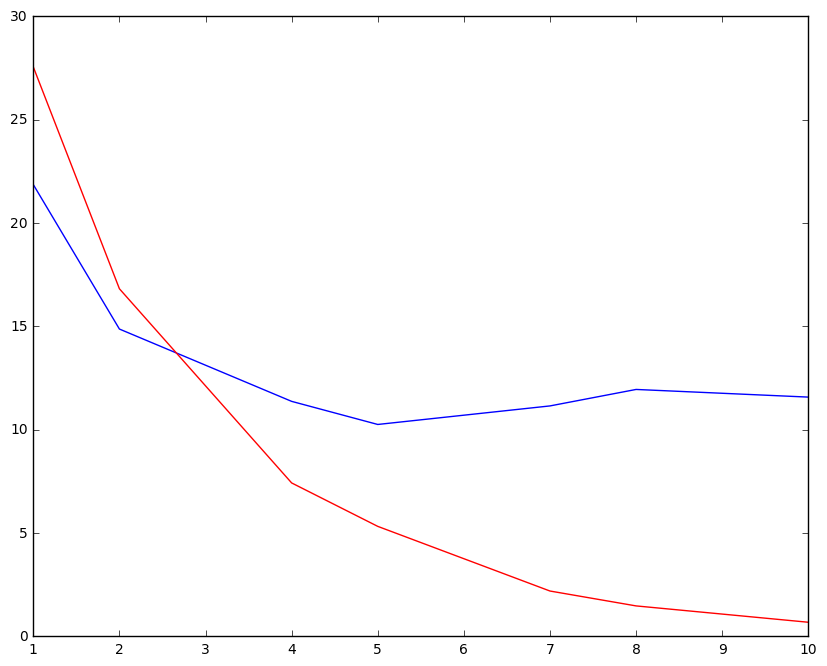

In [17]:
plt.figure(figsize=(10, 8))
plt.plot(depths, test_score, c='b')
plt.plot(depths, train_score, c='r')

# Сравним со sklearn DecisionTree


<img src="http://assets.inhabitat.com/files/cardboardbike4.jpg">

In [13]:
dtr = DecisionTreeRegressor(max_depth=100)
dtr.fit(X_train, y_train)
np.sum((y_test - dtr.predict(X_test))**2)/len(y_test)

11.355511811023623

In [14]:
np.sum((y_train - dtr.predict(X_train))**2)/len(y_train)

0.0

In [15]:
dtr_train_score = []
dtr_test_score = []
for d in range(1, 10):
    dtr = DecisionTreeRegressor(max_depth=d)
    dtr.fit(X_train, y_train)
    dtr_train_score.append(np.sum((y_train - dtr.predict(X_train))**2)/len(y_train))
    dtr_test_score.append(np.sum((y_test - dtr.predict(X_test))**2)/len(y_test))

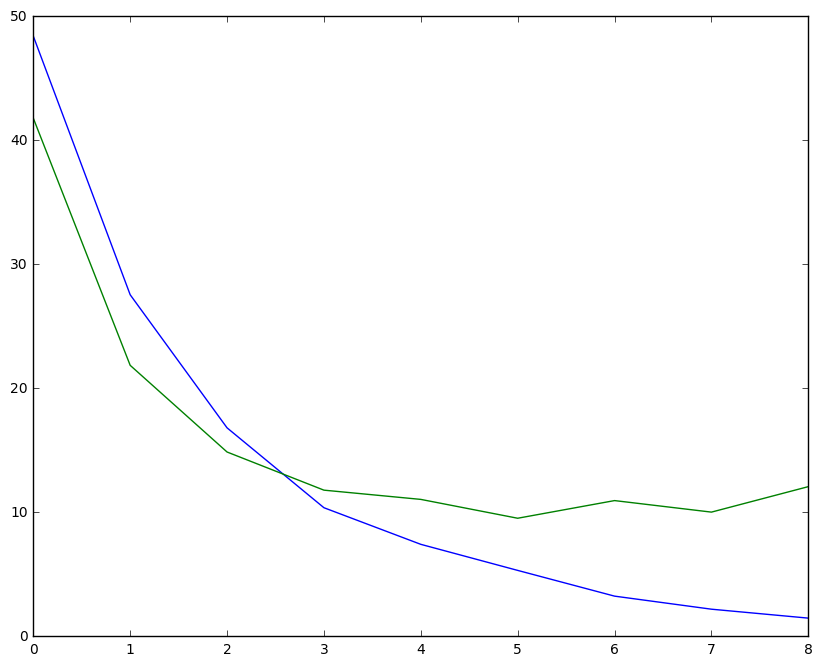

In [18]:
plt.figure(figsize=(10, 8))
plt.plot(range(len(dtr_train_score)), dtr_train_score)
plt.plot(range(len(dtr_test_score)), dtr_test_score)